<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">Predicting Rare Species</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Deep Learning Project</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1-environment-setup)
    * [1.1 Import Libraries](#11-import-libraries)
    * [1.2 Import Dataset](#12-import-dataset)
* [2. Exploratory Data Analysis](#2-exploratory-data-analysis)
    * [2.1 Visualizations](#21-visualizations)
    * [2.2 Import Dataset](#22-feature-engineering)
* [3. Splitting the Dataset](#3-splitting-the-dataset)
* [4. Splitting the Dataset](#4-preprocessing)
    * [4.1 Image Generator and Augmentation](#41-image-generator-and-augmentation)


<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>

## 1.1 Import Libraries

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from classes import *
from functions import *

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam
from keras.metrics import AUC, F1Score, CategoricalAccuracy


## 1.2 Import Dataset

The amount of data we have is not supported by GitHub (where we have our project stored). The solution is: create a folder named data and allocate the rare_species file inside it. The gitignore file makes sure this folder is not used when we are pulling or pushing changes but everyone needs to have it on their machines locally. A random seed was used to ensure that the splits stay the same. 

In [3]:
path = Path("data/rare_species")

In [4]:
# Import Metadata
metadata_path = Path("../data/rare_species/metadata.csv")
df = pd.read_csv(metadata_path)
df.head()

rare_species_id  eol_content_id  eol_page_id  \
0  75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1  28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2  00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3  29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4  94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   

    kingdom    phylum            family  \
0  animalia  mollusca         unionidae   
1  animalia  chordata       geoemydidae   
2  animalia  chordata  cryptobranchidae   
3  animalia  chordata          turdidae   
4  animalia  chordata         indriidae   

                                           file_path  
0  mollusca_unionidae/12853737_449393_eol-full-si...  
1  chordata_geoemydidae/20969394_793083_eol-full-...  
2  chordata_cryptobranchidae/28895411_319982_eol-...  
3  chordata_turdidae/29658536_45510188_eol-full-s...  
4  chordata_indriidae/21252576_7250886_eol-full-s...

In [5]:
df.shape # 11983 images

(11983, 7)

In [6]:
# Windows
# df["full_file_path"] = df["file_path"].apply(lambda x: os.path.join(path, x.replace("/", "\\")))

# Mac
df["full_file_path"] = df["file_path"].apply(lambda x: Path(x))
df

rare_species_id  eol_content_id  eol_page_id  \
0      75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1      28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2      00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3      29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4      94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
...                                     ...             ...          ...   
11978  1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89        29734618      1011315   
11979  628bf2b4-6ecc-4017-a8e6-4306849e0cfc        29972861      1056842   
11980  0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9        30134195     52572074   
11981  27fdb1e9-c5fb-459a-8b6a-6fb222b1c512         9474963     46559139   
11982  54894a59-151f-4814-ac32-3a336841e58e         9465817       326525   

        kingdom    phylum            family  \
0      animalia  mollusca         unionidae   
1      animalia  chordata       geoemydidae   
2      animalia  chordata  cryptobranchidae   
3      animalia  chordata          turdidae   
4      animalia  chordata         indriidae   
...         ...       ...               ...   
11978  animalia  chordata         leporidae   
11979  animalia  chordata          emydidae   
11980  animalia  chordata        dasyatidae   
11981  animalia  chordata        mustelidae   
11982  animalia  chordata         lemuridae   

                                               file_path  \
0      mollusca_unionidae/12853737_449393_eol-full-si...   
1      chordata_geoemydidae/20969394_793083_eol-full-...   
2      chordata_cryptobranchidae/28895411_319982_eol-...   
3      chordata_turdidae/29658536_45510188_eol-full-s...   
4      chordata_indriidae/21252576_7250886_eol-full-s...   
...                                                  ...   
11978  chordata_leporidae/29734618_1011315_eol-full-s...   
11979  chordata_emydidae/29972861_1056842_eol-full-si...   
11980  chordata_dasyatidae/30134195_52572074_eol-full...   
11981  chordata_mustelidae/9474963_46559139_eol-full-...   
11982  chordata_lemuridae/9465817_326525_eol-full-siz...   

                                          full_file_path  
0      mollusca_unionidae/12853737_449393_eol-full-si...  
1      chordata_geoemydidae/20969394_793083_eol-full-...  
2      chordata_cryptobranchidae/28895411_319982_eol-...  
3      chordata_turdidae/29658536_45510188_eol-full-s...  
4      chordata_indriidae/21252576_7250886_eol-full-s...  
...                                                  ...  
11978  chordata_leporidae/29734618_1011315_eol-full-s...  
11979  chordata_emydidae/29972861_1056842_eol-full-si...  
11980  chordata_dasyatidae/30134195_52572074_eol-full...  
11981  chordata_mustelidae/9474963_46559139_eol-full-...  
11982  chordata_lemuridae/9465817_326525_eol-full-siz...  

[11983 rows x 8 columns]

In [7]:
pd.set_option('display.max_colwidth', None)
print(df['full_file_path'])

0               mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg
1             chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg
2        chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg
3              chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg
4              chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg
                                       ...                               
11978          chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg
11979           chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg
11980        chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg
11981         chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg
11982            chordata_lemuridae/9465817_326525_eol-full-size-copy.jpg
Name: full_file_path, Length: 11983, dtype: object


<div class="alert alert-block alert-success">

# **2.** Exploratory Data Analysis

<div>

## 2.1 Visualizations

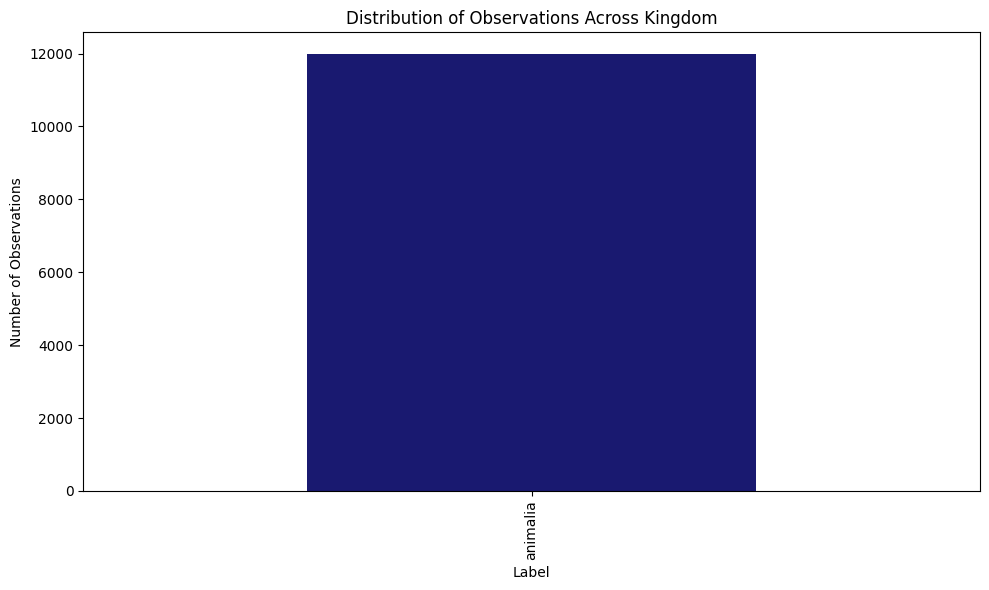

In [8]:
kingdom_counts = df['kingdom'].value_counts()
plot_graph(title='Distribution of Observations Across Kingdom', xlabel='Kingdom', ylabel='Number of Observations',  counts=kingdom_counts)

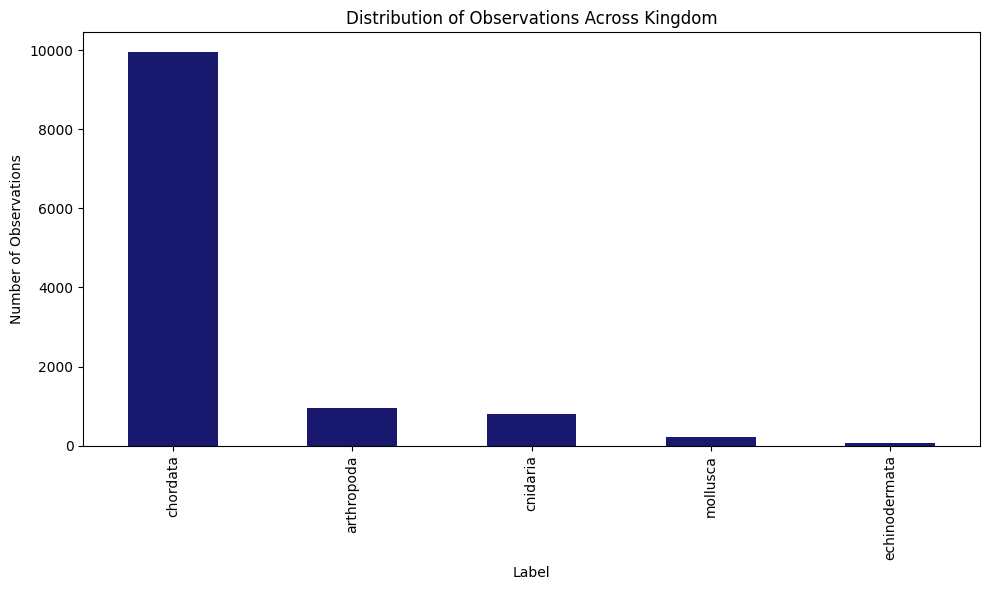

In [9]:
phylum_counts = df['phylum'].value_counts()
plot_graph(title='Distribution of Observations Across Phylum', xlabel='Phylum', ylabel='Number of Observations',  counts=phylum_counts)

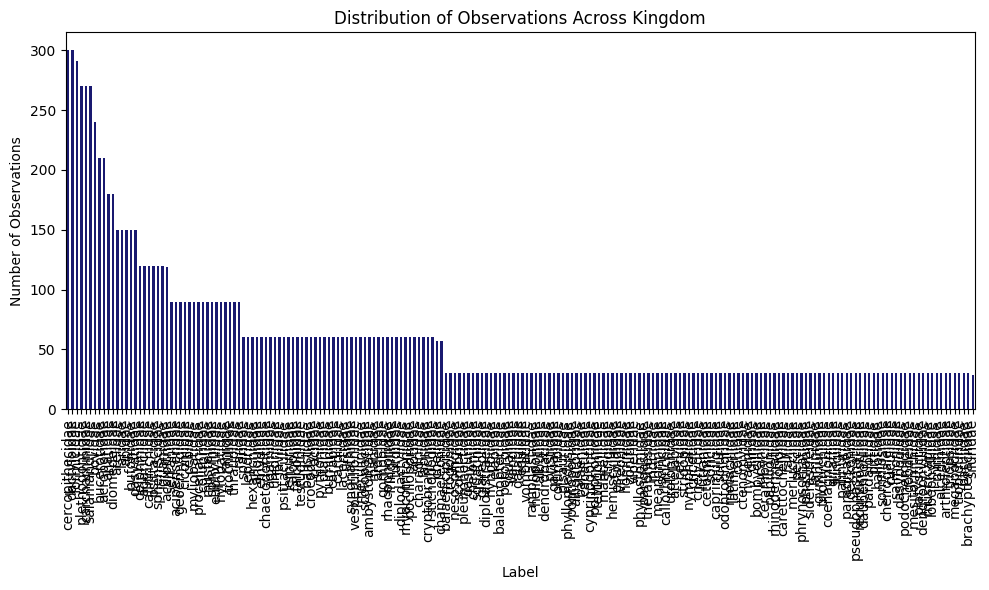

In [10]:
family_counts = df['family'].value_counts()
plot_graph(title='Distribution of Observations Across Family', xlabel='Family', ylabel='Number of Observations',  counts=family_counts)

In [11]:
family_counts = df["family"].value_counts(normalize=True)*100

df_family_proportions = pd.DataFrame({
    "Family": family_counts.index,
    "Proportion (%)": family_counts.values  
})

df_family_proportions # 202 different families

Family  Proportion (%)
0      cercopithecidae        2.503547
1          dactyloidae        2.503547
2           formicidae        2.428440
3       plethodontidae        2.253192
4       carcharhinidae        2.253192
..                 ...             ...
197       megapodiidae        0.250355
198       tropiduridae        0.250355
199          parulidae        0.250355
200  brachypteraciidae        0.250355
201          siluridae        0.242010

[202 rows x 2 columns]

In [12]:
num_families_025 = int((df_family_proportions["Proportion (%)"] <= 0.2505).sum())
num_families_025 # 118 families have less than 0.2505% of images

118

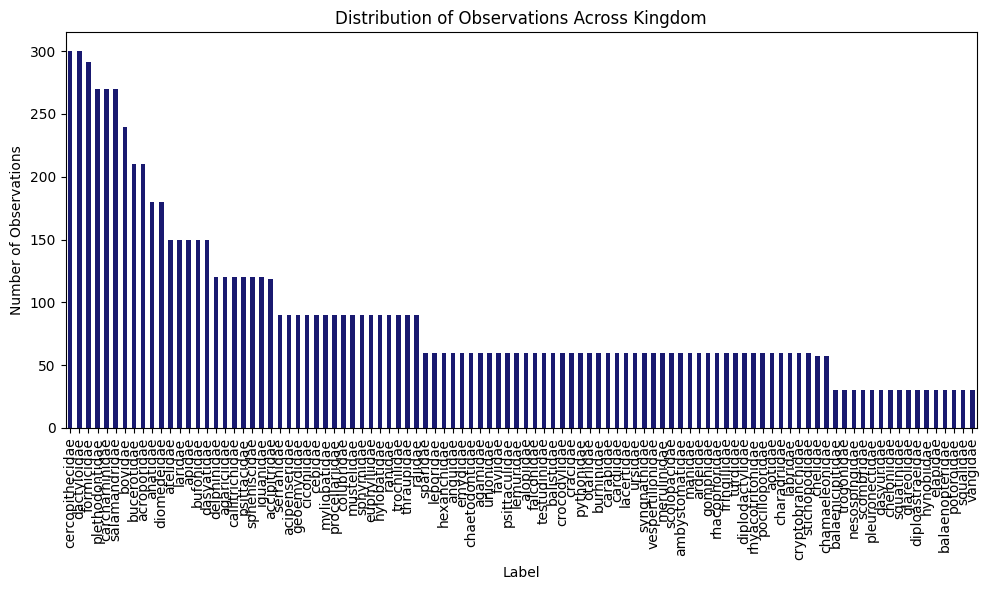

In [13]:
top_100_families = df['family'].value_counts().nlargest(100)
plot_graph(title='Distribution of Observations Across Top 100 Families', xlabel='Family', ylabel='Number of Observations',  counts=top_100_families)

In [14]:
top_84_family_proportion_sum = df_family_proportions.iloc[:84]["Proportion (%)"].sum()
top_84_family_proportion_sum # although 118 families represent less than 0.25% of the dataset, the 84 that have >0.25% represent only 70.46% of the dataset

np.float64(70.46649420011681)

## 2.2 Feature Engineering

In [15]:
# is it better to predict phylum and then family or a concatenation of the two?

In [16]:
df["phylum_family"] = df["phylum"] + "_" + df["family"]
df

rare_species_id  eol_content_id  eol_page_id  \
0      75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1      28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2      00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3      29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4      94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
...                                     ...             ...          ...   
11978  1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89        29734618      1011315   
11979  628bf2b4-6ecc-4017-a8e6-4306849e0cfc        29972861      1056842   
11980  0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9        30134195     52572074   
11981  27fdb1e9-c5fb-459a-8b6a-6fb222b1c512         9474963     46559139   
11982  54894a59-151f-4814-ac32-3a336841e58e         9465817       326525   

        kingdom    phylum            family  \
0      animalia  mollusca         unionidae   
1      animalia  chordata       geoemydidae   
2      animalia  chordata  cryptobranchidae   
3      animalia  chordata          turdidae   
4      animalia  chordata         indriidae   
...         ...       ...               ...   
11978  animalia  chordata         leporidae   
11979  animalia  chordata          emydidae   
11980  animalia  chordata        dasyatidae   
11981  animalia  chordata        mustelidae   
11982  animalia  chordata         lemuridae   

                                                              file_path  \
0             mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg   
1           chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg   
2      chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg   
3            chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg   
4            chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg   
...                                                                 ...   
11978        chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg   
11979         chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg   
11980      chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg   
11981       chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg   
11982          chordata_lemuridae/9465817_326525_eol-full-size-copy.jpg   

                                                         full_file_path  \
0             mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg   
1           chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg   
2      chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg   
3            chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg   
4            chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg   
...                                                                 ...   
11978        chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg   
11979         chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg   
11980      chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg   
11981       chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg   
11982          chordata_lemuridae/9465817_326525_eol-full-size-copy.jpg   

                   phylum_family  
0             mollusca_unionidae  
1           chordata_geoemydidae  
2      chordata_cryptobranchidae  
3              chordata_turdidae  
4             chordata_indriidae  
...                          ...  
11978         chordata_leporidae  
11979          chordata_emydidae  
11980        chordata_dasyatidae  
11981        chordata_mustelidae  
11982         chordata_lemuridae  

[11983 rows x 9 columns]

In [17]:
family_phylum_counts = df.groupby("phylum")["family"].nunique()

In [18]:
family_phylum_counts # the phylum with the most families is chordata

phylum
arthropoda        17
chordata         166
cnidaria          13
echinodermata      1
mollusca           5
Name: family, dtype: int64

In [19]:
anomaly_counts = df.groupby("family")["phylum"].nunique()

In [20]:
anomaly_counts.value_counts() # there are no families that belong to more than 1 phylum

phylum
1    202
Name: count, dtype: int64

In [21]:
phylum_family_counts = df["phylum_family"].value_counts(normalize=True)*100

df_phylum_family_proportions = pd.DataFrame({
    "phylum_family": phylum_family_counts.index,
    "Proportion (%)": phylum_family_counts.values.round(4)  
})

df_phylum_family_proportions # 202 different families

phylum_family  Proportion (%)
0      chordata_cercopithecidae          2.5035
1          chordata_dactyloidae          2.5035
2         arthropoda_formicidae          2.4284
3       chordata_plethodontidae          2.2532
4       chordata_carcharhinidae          2.2532
..                          ...             ...
197       chordata_megapodiidae          0.2504
198       chordata_tropiduridae          0.2504
199          chordata_parulidae          0.2504
200  chordata_brachypteraciidae          0.2504
201          chordata_siluridae          0.2420

[202 rows x 2 columns]

<div class="alert alert-block alert-success">

# **3.** Splitting the Dataset

<div>

In [22]:
# Split the data into training, validation, and testing sets
train_df, test_valid_df = train_test_split(df, test_size=0.3, shuffle=True, random_state=42, stratify=df['family'])
valid_df, test_df = train_test_split(test_valid_df, test_size=0.5, shuffle=True, random_state=42, stratify=test_valid_df['family'])

In [23]:
image_base_path = Path("../data/rare_species")
metadata_path = image_base_path / "metadata.csv"
base_output_dir = image_base_path

In [24]:
organize_split(image_base_path=image_base_path, base_output_dir=base_output_dir, split_df=train_df, split_name="train")
organize_split(image_base_path=image_base_path, base_output_dir=base_output_dir, split_df=valid_df, split_name="val")
organize_split(image_base_path=image_base_path, base_output_dir=base_output_dir, split_df=test_df, split_name="test")

Not found: ../data/rare_species/chordata_ranidae/21985147_2920193_eol-full-size-copy.jpg
Not found: ../data/rare_species/chordata_bufonidae/14130545_332433_eol-full-size-copy.jpg
Not found: ../data/rare_species/cnidaria_agariciidae/21699220_45276518_eol-full-size-copy.jpg
Not found: ../data/rare_species/chordata_hexanchidae/29652508_46560148_eol-full-size-copy.jpg
Not found: ../data/rare_species/chordata_geoemydidae/29538706_793083_eol-full-size-copy.jpg
Not found: ../data/rare_species/chordata_cervidae/15265090_308403_eol-full-size-copy.jpg
Not found: ../data/rare_species/chordata_hylobatidae/28175522_1038643_eol-full-size-copy.jpg
Not found: ../data/rare_species/chordata_mesitornithidae/28312603_915363_eol-full-size-copy.jpg
Not found: ../data/rare_species/chordata_sparidae/21866390_46580005_eol-full-size-copy.jpg
Not found: ../data/rare_species/arthropoda_formicidae/29369457_460290_eol-full-size-copy.jpg
Not found: ../data/rare_species/chordata_balaenopteridae/21756543_46559441_eol-

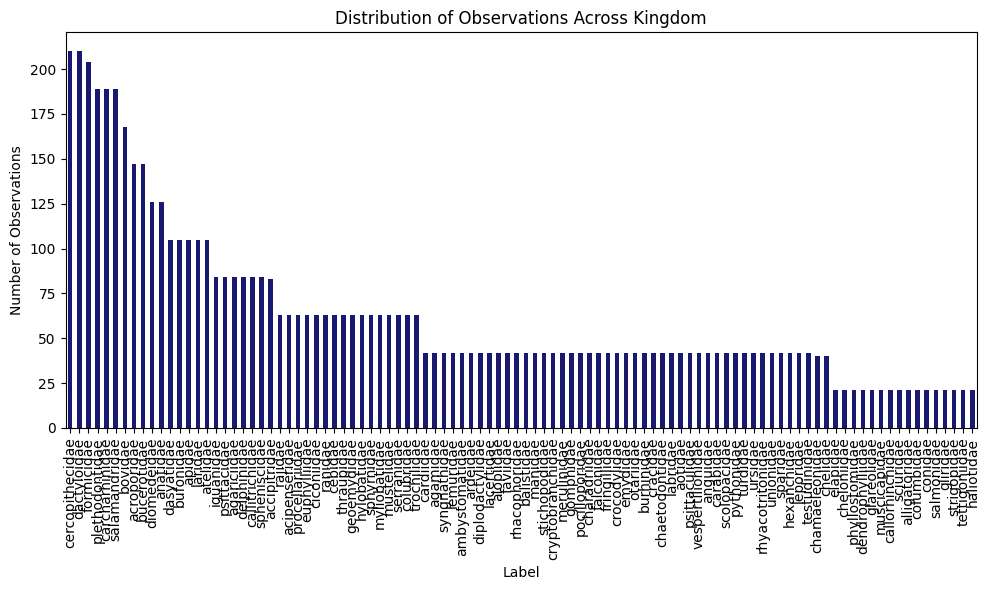

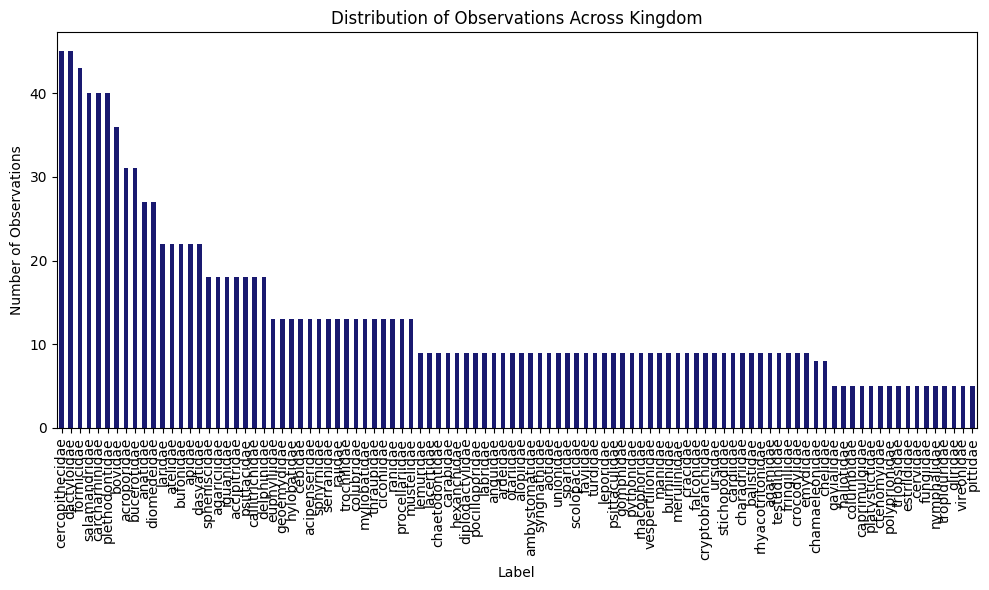

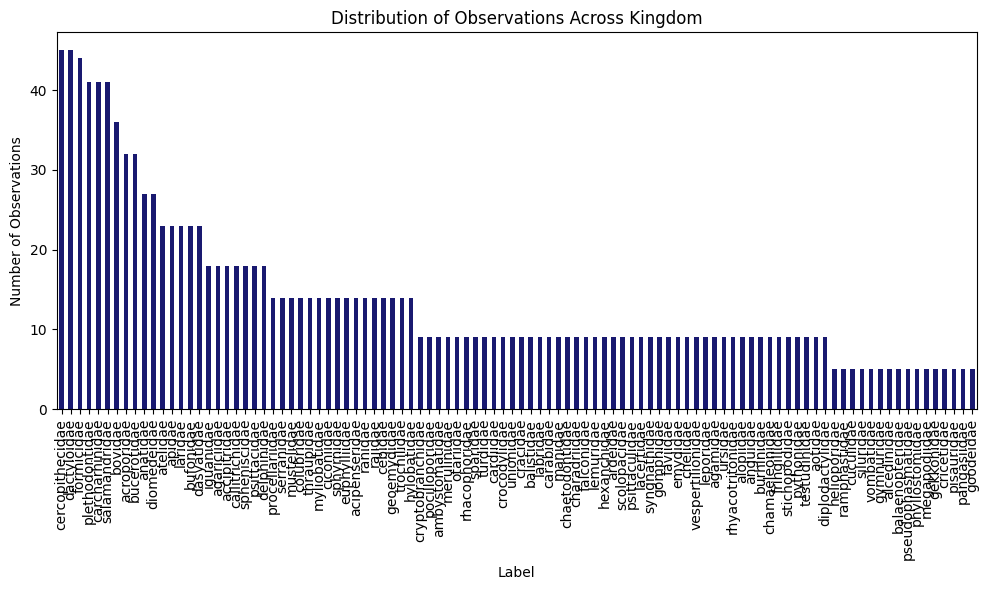

In [25]:
train_df_counts = train_df['family'].value_counts().nlargest(100)
plot_graph(title='Distribution of Observations - Train Dataset', xlabel='Family', ylabel='Number of Observations',  counts=train_df_counts )

valid_df_counts = valid_df['family'].value_counts().nlargest(100)
plot_graph(title='Distribution of Observations - Validation Dataset', xlabel='Family', ylabel='Number of Observations',  counts=valid_df_counts )

test_df_counts = test_df['family'].value_counts().nlargest(100)
plot_graph(title='Distribution of Observations - Test Dataset', xlabel='Family', ylabel='Number of Observations',  counts=test_df_counts )

In [26]:
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(valid_df)}")
print(f"Testing samples: {len(test_df)}")

Training samples: 8388
Validation samples: 1797
Testing samples: 1798


<div class="alert alert-block alert-success">

# **4.** Preprocessing

<div>

- Normalizes pixel values (e.g., rescaling from [0,255] to [0,1]).
- Resizes images to a fixed size (e.g., 224x224 pixels).
- Applies augmentation (only during training).
- Converts images to batches (e.g., batch_size=32 loads 32 images at a time).

In [27]:
batch_size = 32
image_size = (224, 224)
preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)
train_ds, class_names = preprocess.load_img(Path("../data/rare_species/train"), value_range=(0,1), factor=0.3, num_ops=3, augment=True)
val_ds, class_names = preprocess.load_img(Path("../data/rare_species/val"))
test_ds, class_names = preprocess.load_img(Path("../data/rare_species/test"))

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1798 files belonging to 202 classes.


In [28]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 202), dtype=tf.float32, name=None))>

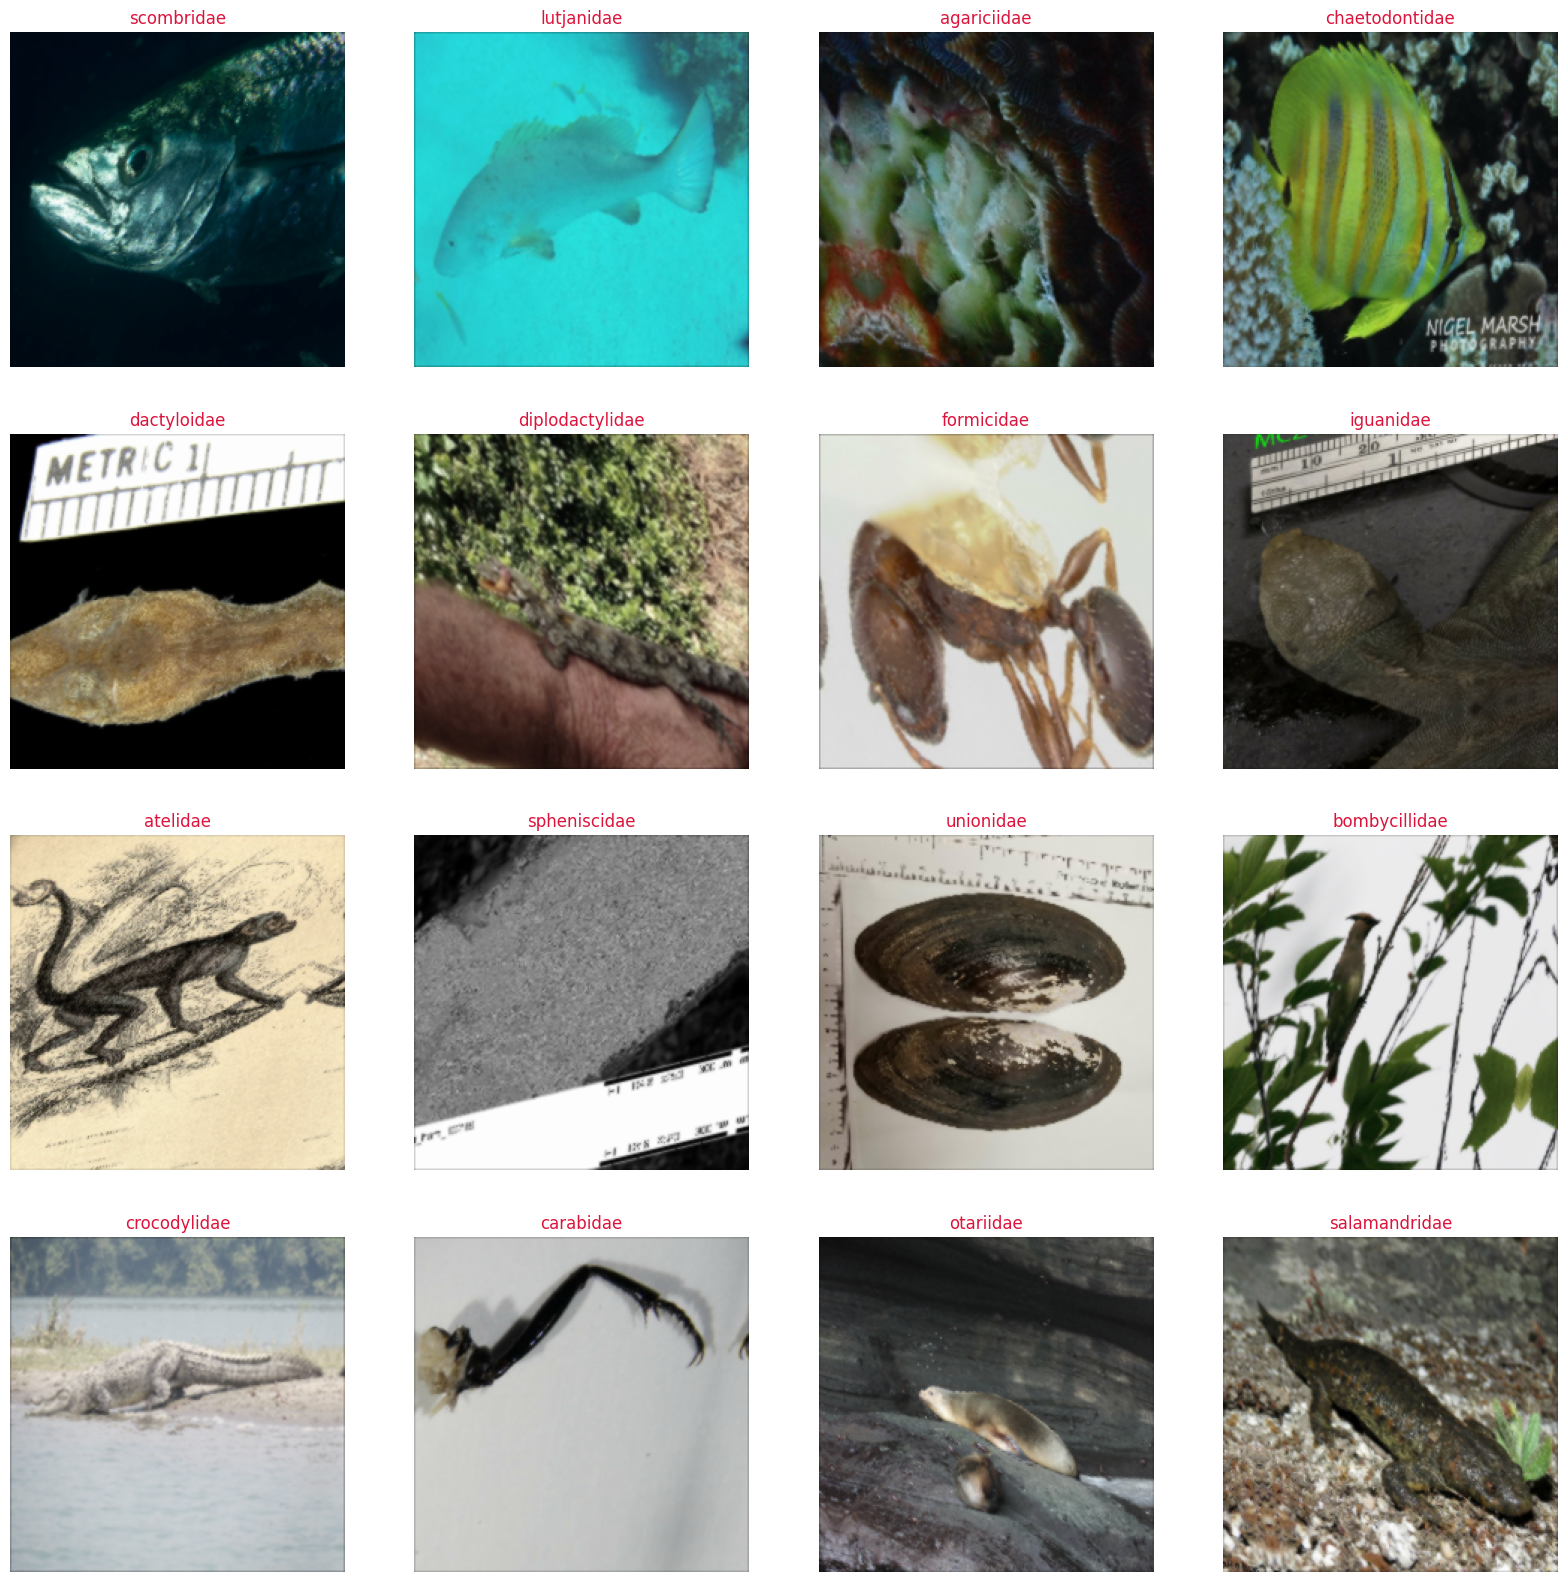

In [29]:
num_images = 16
rows, cols = 4, 4
plot_batch(train_ds, class_names=class_names, num_images=num_images, rows=rows, cols=cols)

<div class="alert alert-block alert-success">

# **5.** Models

<div>

## Sequential

In [30]:
layers = [Conv2D(16, (3, 3), activation="relu", input_shape=(224, 224, 3)),
          MaxPooling2D((2, 2)),
          Conv2D(32, (3, 3), activation="relu"),
          MaxPooling2D((2, 2)),
          Conv2D(64, (3, 3), activation="relu"),
          MaxPooling2D((2, 2)),
          Flatten(),
          Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
          Dense(202, activation="softmax")
          ]

/Users/margaridabravocardoso/venvs/deep_learning_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
first_sequential_model = build_sequential_model(list_of_layers=layers)
first_sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    22,151,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 202)            │       103,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,278,890 (84.99 MB)

 Trainable params: 22,278,890 (84.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
n_epochs = 10
batch_size = 32
initial_lr = 0.01
final_lr = 0.001
verbose = 1
metrics = [
    CategoricalAccuracy(name="accuracy"),
    AUC(name="auc"),
    F1Score(average="macro", name="f1_score")
]


In [33]:
my_scheduler_fn = lr_scheduler(initial_lr, final_lr, n_epochs)
callbacks = get_callbacks(
    checkpoint_file_path="checkpoints/model.keras",
    metrics_file_path="logs/run1.csv",
    lr_scheduler=my_scheduler_fn
)

first_sequential_model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
history = first_sequential_model.fit(train_ds, epochs= n_epochs, verbose= 1, batch_size = batch_size, validation_data= val_ds, callbacks=callbacks)

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 161s 607ms/step - accuracy: 0.0334 - loss: 5.8258 - val_accuracy: 0.0634 - val_loss: 4.9391
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 162s 615ms/step - accuracy: 0.0720 - loss: 4.8953 - val_accuracy: 0.0601 - val_loss: 5.3308
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 172s 649ms/step - accuracy: 0.0940 - loss: 4.7107 - val_accuracy: 0.0974 - val_loss: 4.7784
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 166s 627ms/step - accuracy: 0.1061 - loss: 4.6116 - val_accuracy: 0.1013 - val_loss: 4.7247
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 172s 649ms/step - accuracy: 0.1124 - loss: 4.5009 - val_accuracy: 0.0979 - val_loss: 4.9492
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 176s 666ms/step - accuracy: 0.1316 - loss: 4.4075 - val_accuracy: 0.1068 - val_loss: 5.1370
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 179s 679ms/step - accuracy: 0.1400 - loss: 4.3472 - val_accuracy: 0.1113 - val_loss: 4.9518
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 188s 713ms/step - accuracy: 0.1516 -

In [35]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
plot_model_acc(num_epochs=n_epochs, train_acc=acc_train, val_acc=acc_val)

TypeError: plot_model_acc() got an unexpected keyword argument 'train_acc'

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plot_model_loss(num_epochs=n_epochs, train_loss=loss_train, val_loss=loss_val)

In [ ]:
#Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

## ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze weights

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

In [34]:
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds,
    callbacks=[]  # We'll add useful ones next!
)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0187 - loss: 5.2203

KeyboardInterrupt: 

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plot_model_acc(num_epochs=5, train_loss=loss_train, train_val=loss_val)

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training loss')
plt.plot(xaxis, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

## Sequential - mudámos os filtros

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(24, (3, 3), activation="relu", input_shape=(224, 224, 3))) # 32 filters. 3*something
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) 

model.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(202, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', 
              metrics= ['accuracy'])

In [ ]:
epochs=5
history = model.fit(train_generator, epochs= epochs, verbose= 1, batch_size = 20, validation_data= valid_generator)

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training accuracy')
plt.plot(xaxis, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training loss')
plt.plot(xaxis, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)